In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df=pd.read_csv('E:\\working_DATA\\concrete_data.csv')

In [20]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Handling Misssing Data

In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

# Data Spliting

In [5]:
X=df.drop(columns=['Strength'])
y=df['Strength']

# train test split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model training and score without Feature Transforming

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_pred,y_test)

0.42317047978909783

# Checking the Distribution using QQ plot

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


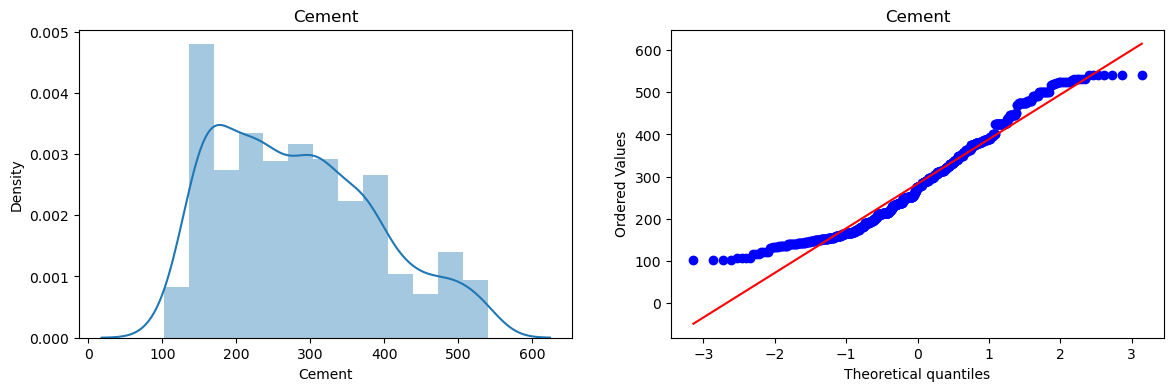

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


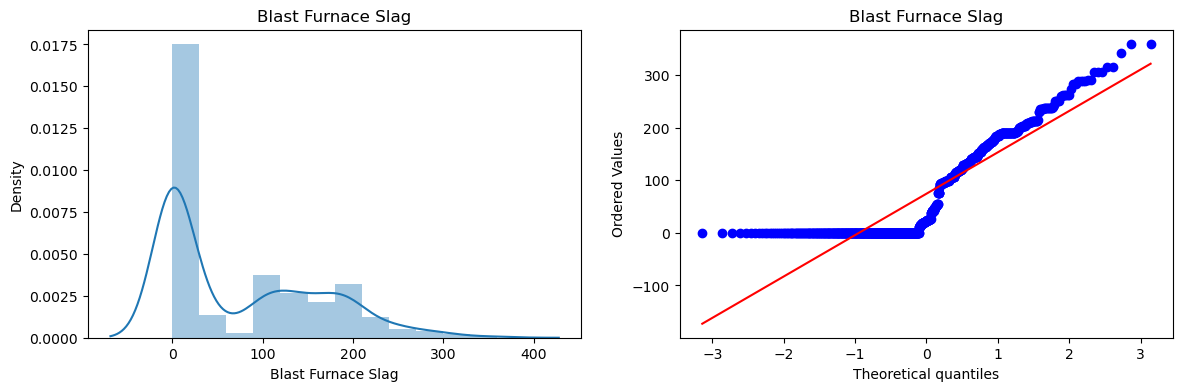

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


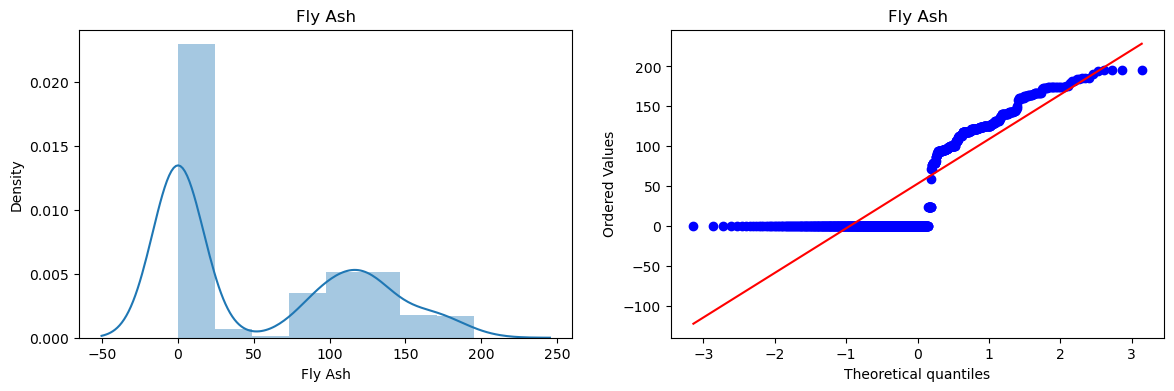

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


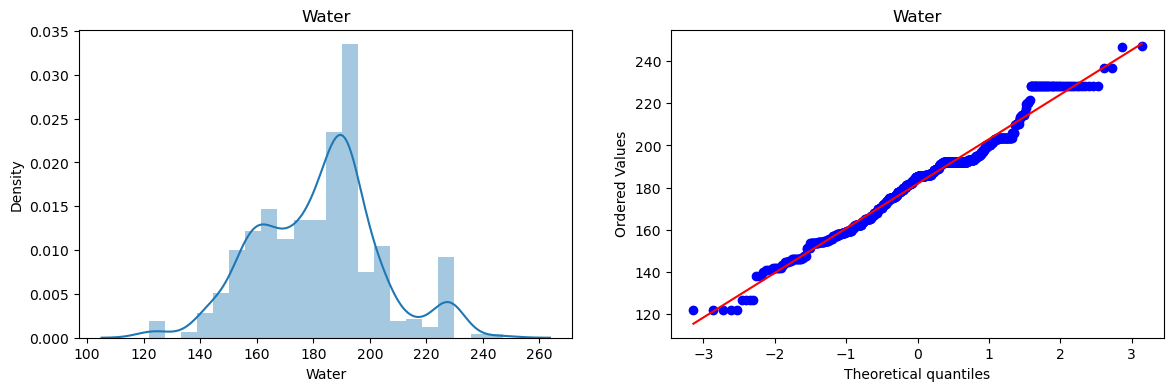

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


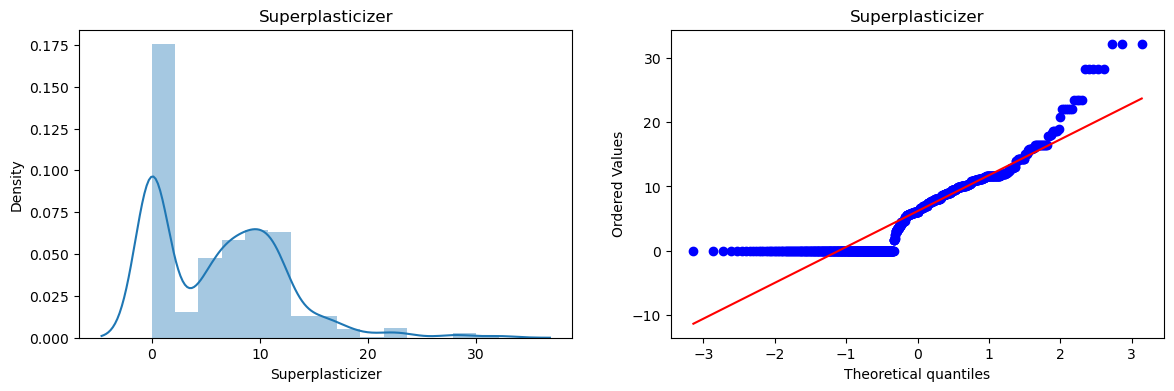

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


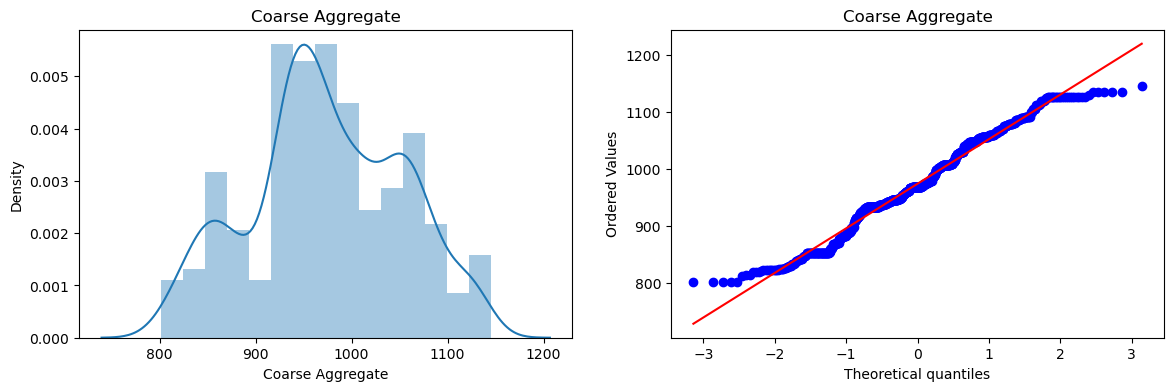

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


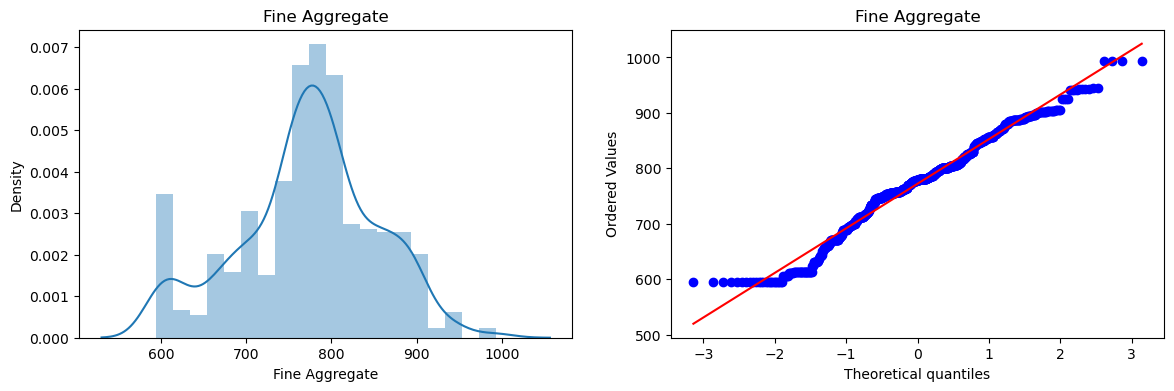

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


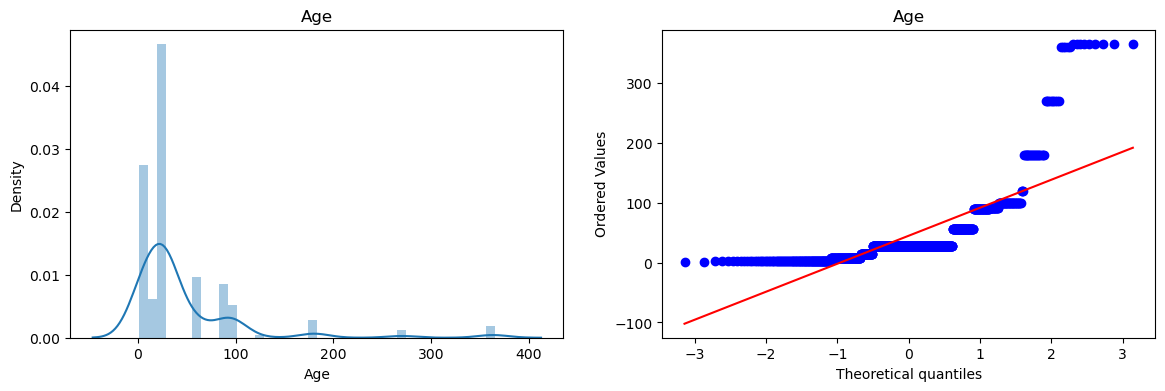

In [8]:
import scipy.stats as stats
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)

    plt.show()

# Power Transforming using yeo-johnson

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.preprocessing import PowerTransformer,FunctionTransformer
pt=PowerTransformer()
X_train_transformed=pt.fit_transform(X_train)
X_test_transformed=pt.transform(X_test)

# Converting Transformed X_train,X_test in DataFrame

In [11]:
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_transformed=pd.DataFrame(X_test_transformed,columns=X_test.columns)

# Checking Function Transformer using QQ plot

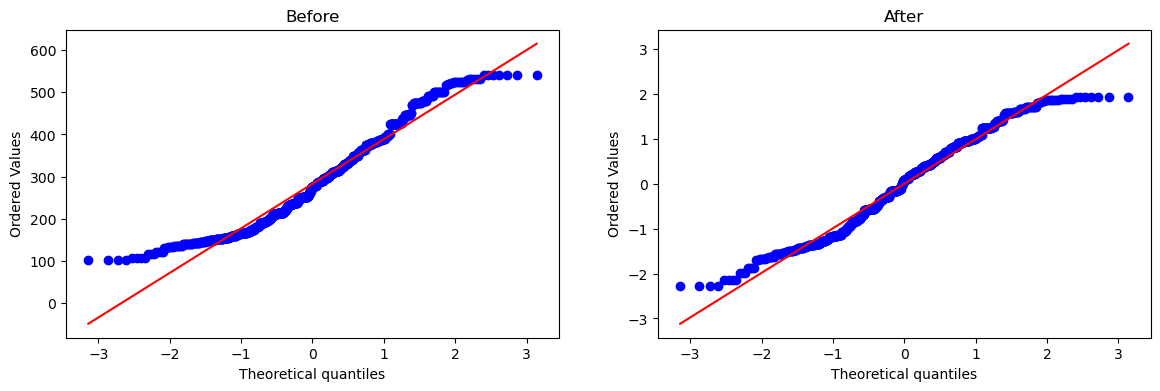

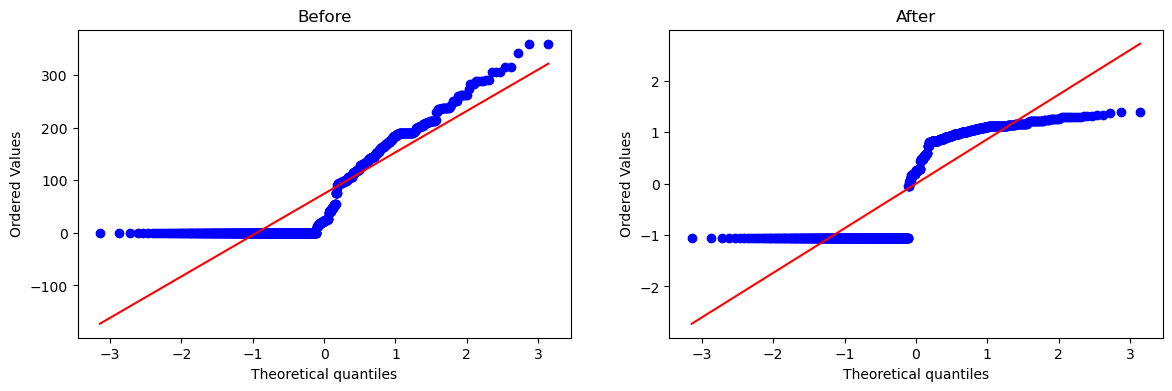

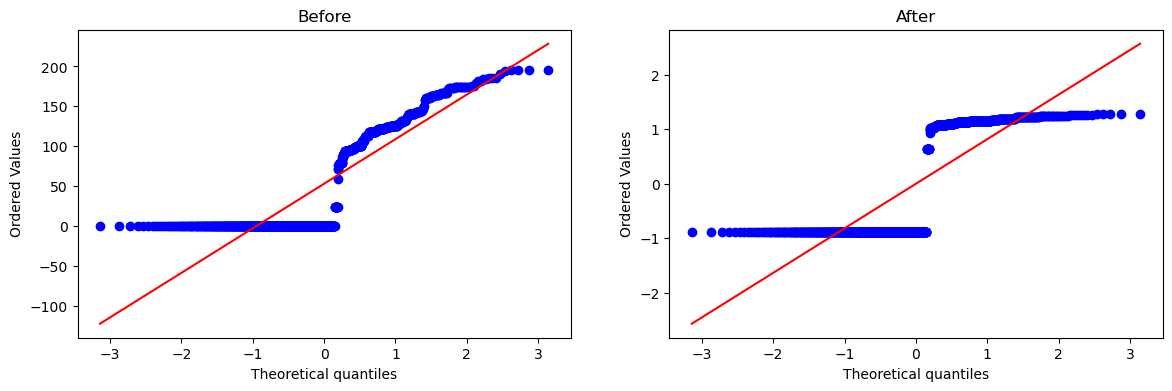

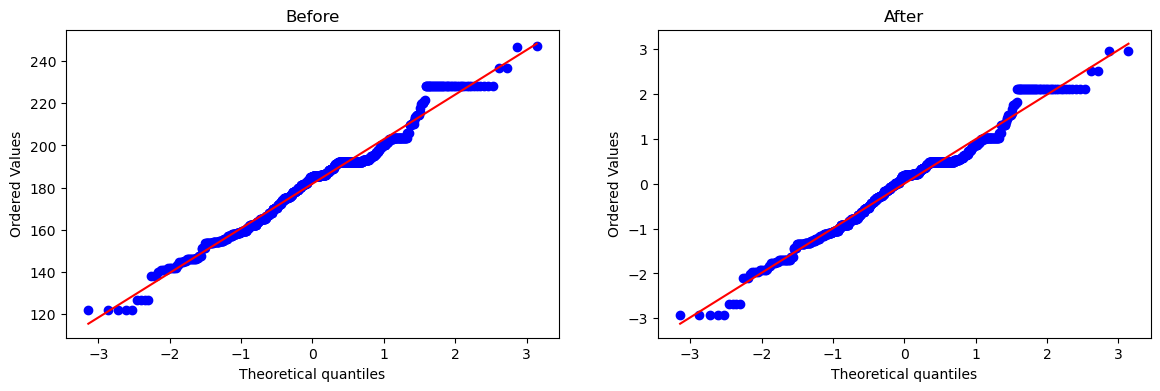

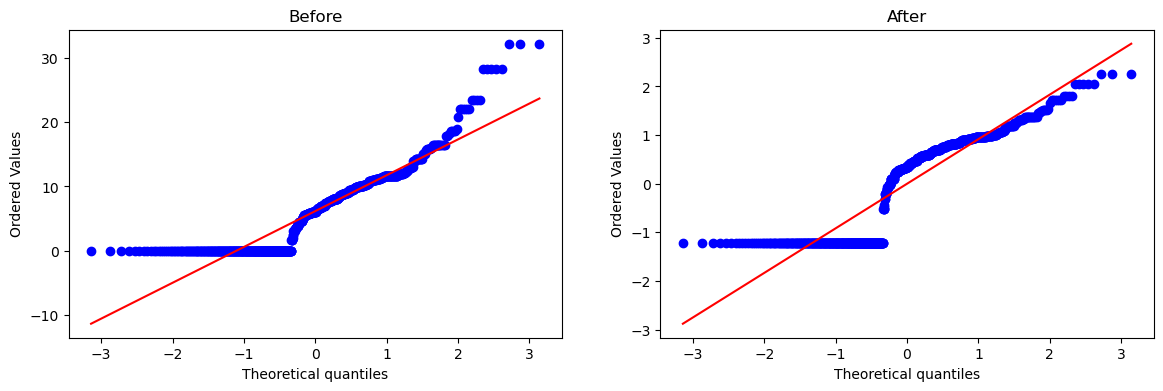

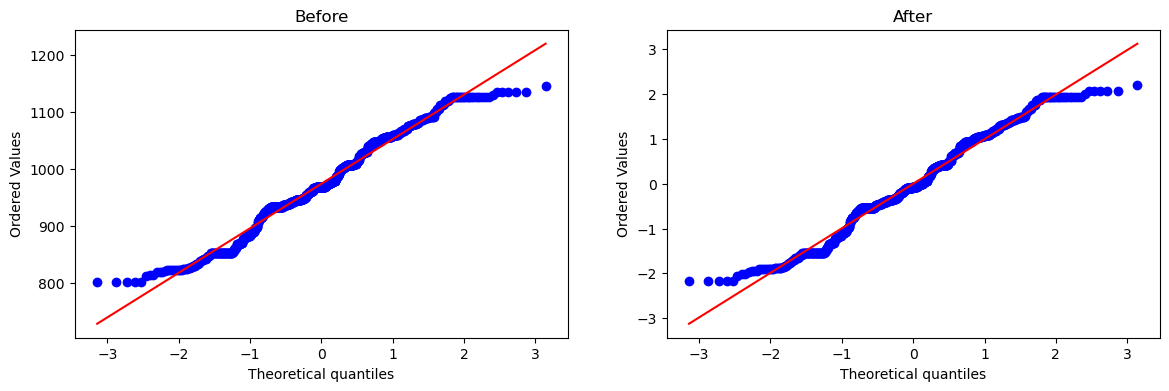

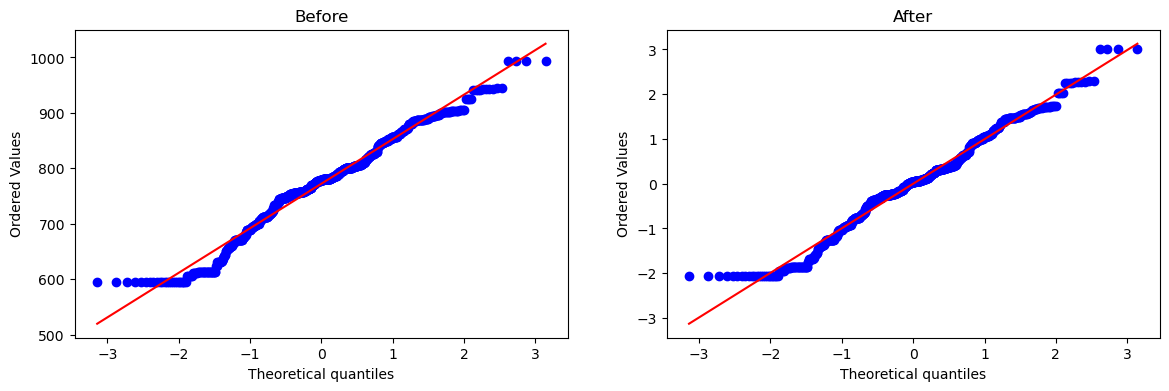

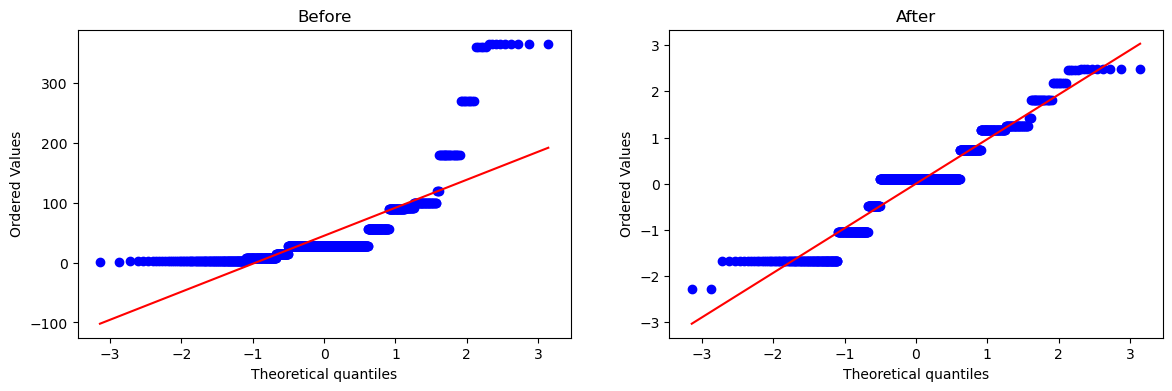

In [12]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title("Before")

    plt.subplot(122)
    stats.probplot(X_train_transformed[col],dist='norm',plot=plt)
    plt.title('After')

    plt.show()

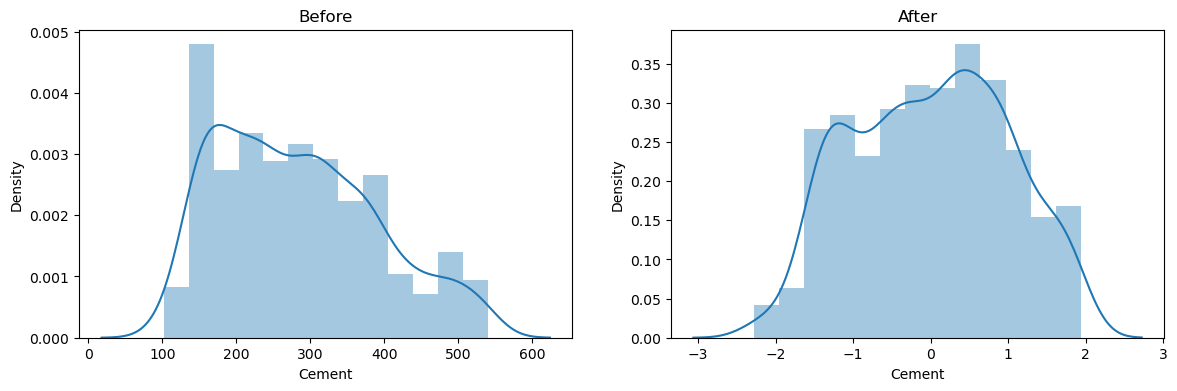

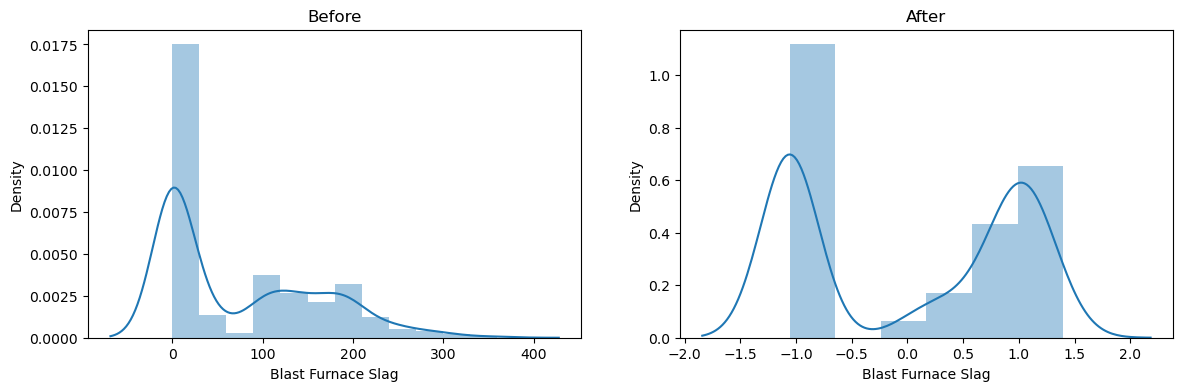

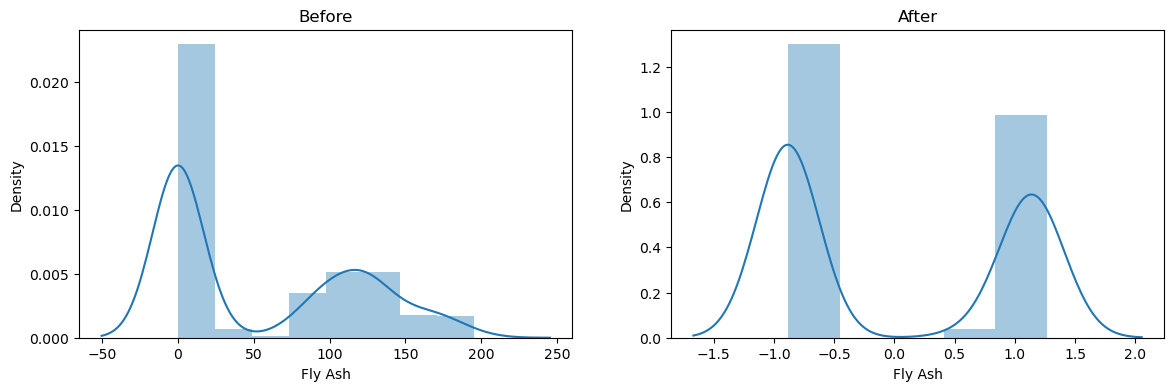

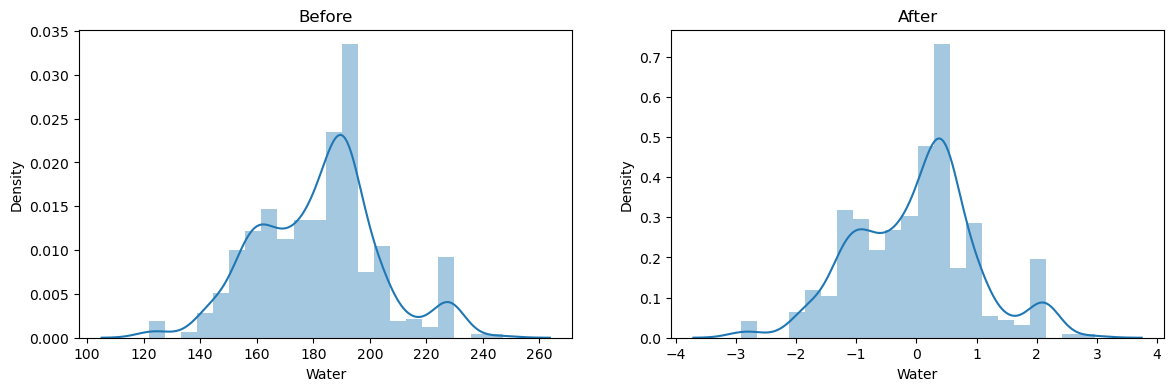

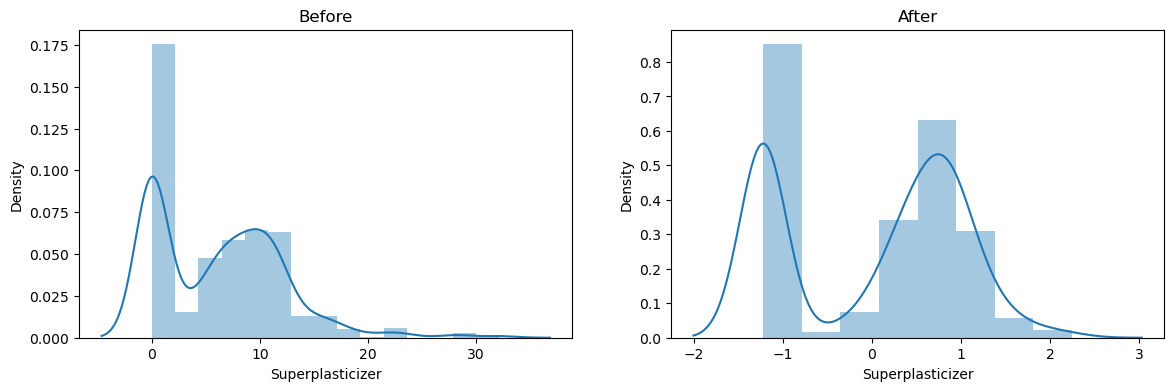

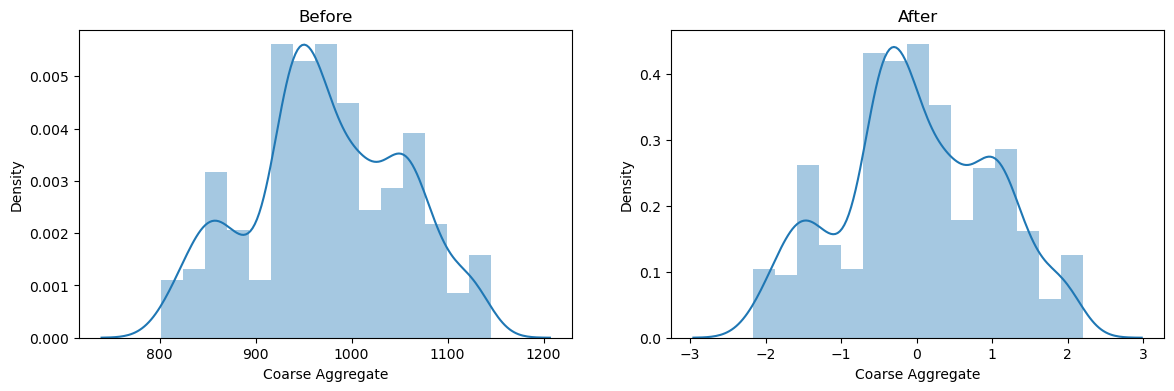

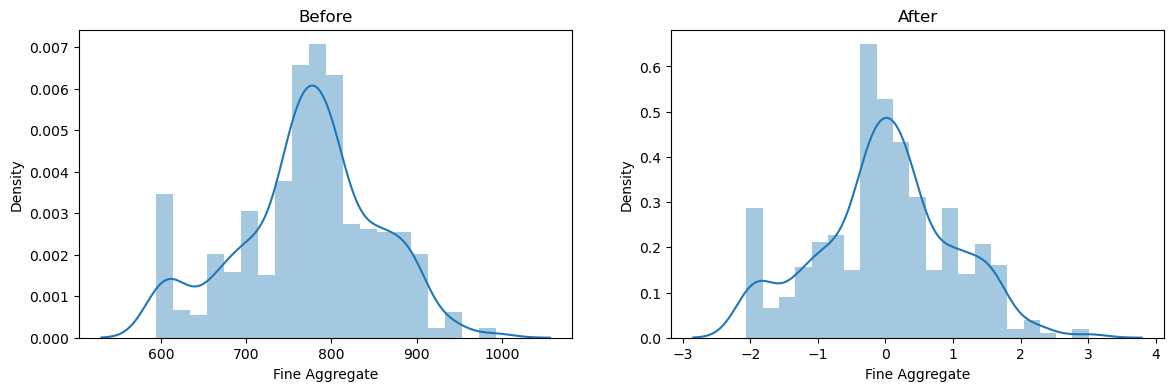

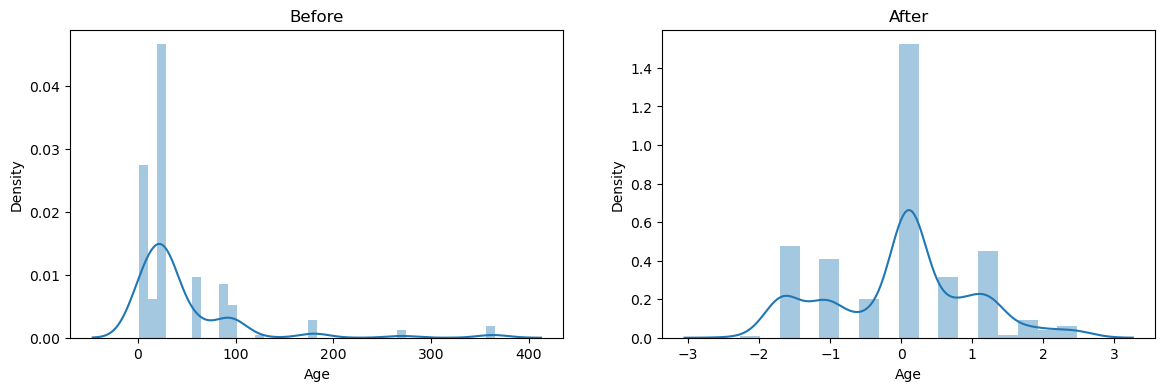

In [13]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title("Before")

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title('After')

    plt.show()

# Model training and score using PowerTransformer(yeo-johnson)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred=lr.predict(X_test_transformed)
r2_score(y_pred,y_test)

0.779768695327321

# Power Transforming using box-cox

In [15]:
from sklearn.preprocessing import PowerTransformer,FunctionTransformer
pt=PowerTransformer(method='box-cox')
X_train_transformed=pt.fit_transform(X_train+0.0000001)
X_test_transformed=pt.transform(X_test+0.0000001)

# Converting Transformed X_train,X_test in DataFrame

In [16]:
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_transformed=pd.DataFrame(X_test_transformed,columns=X_test.columns)

# Checking Function Transformer using QQ plot

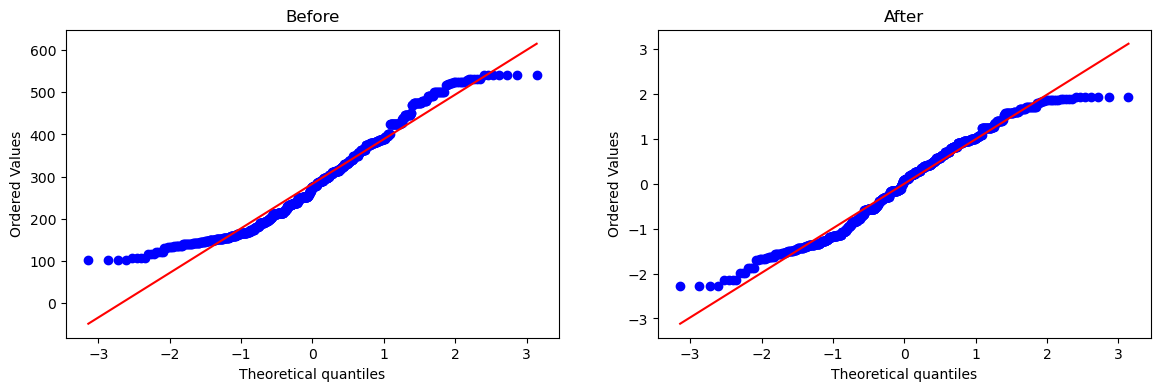

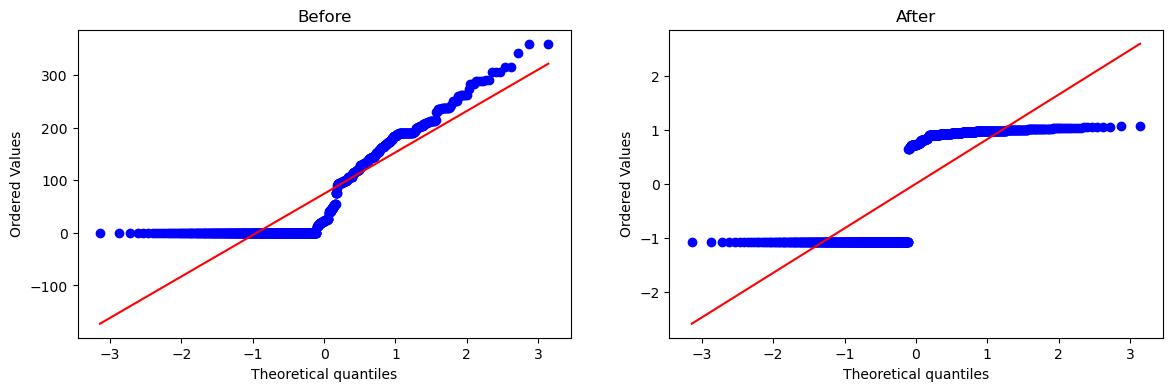

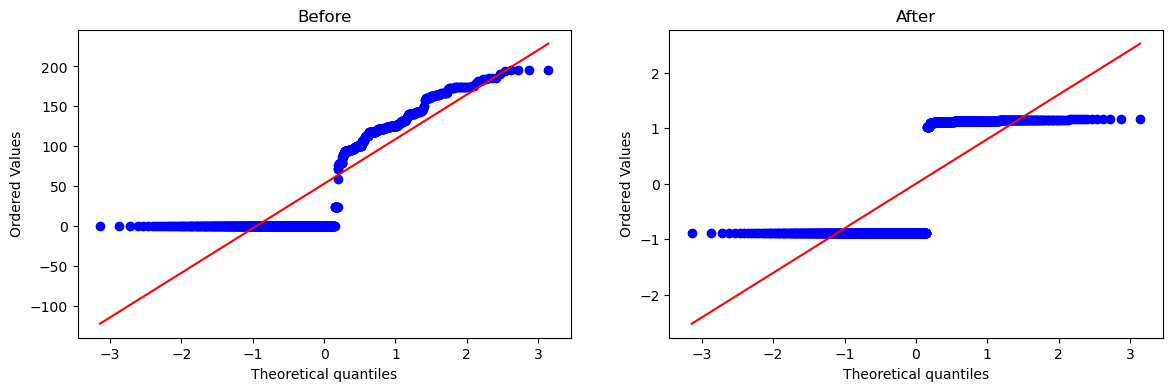

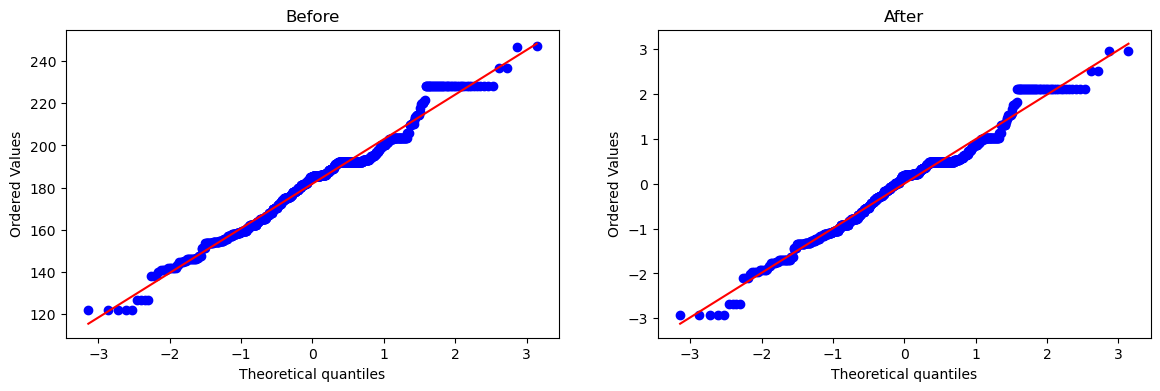

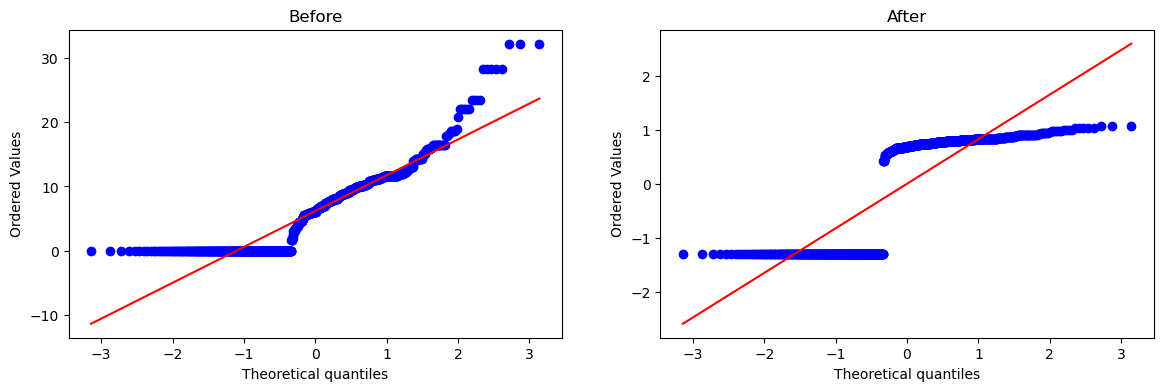

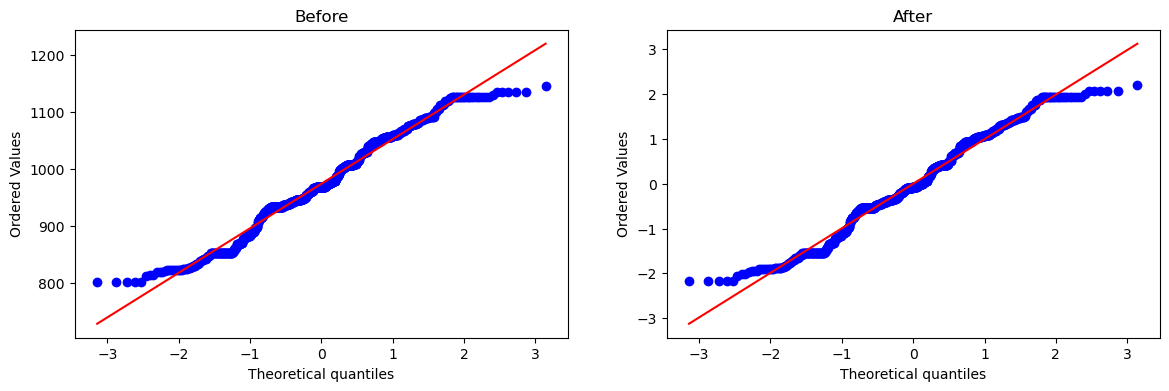

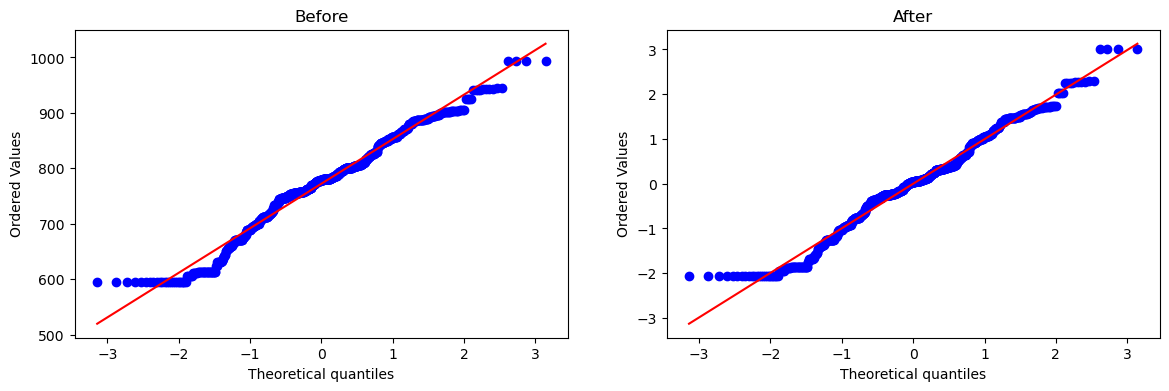

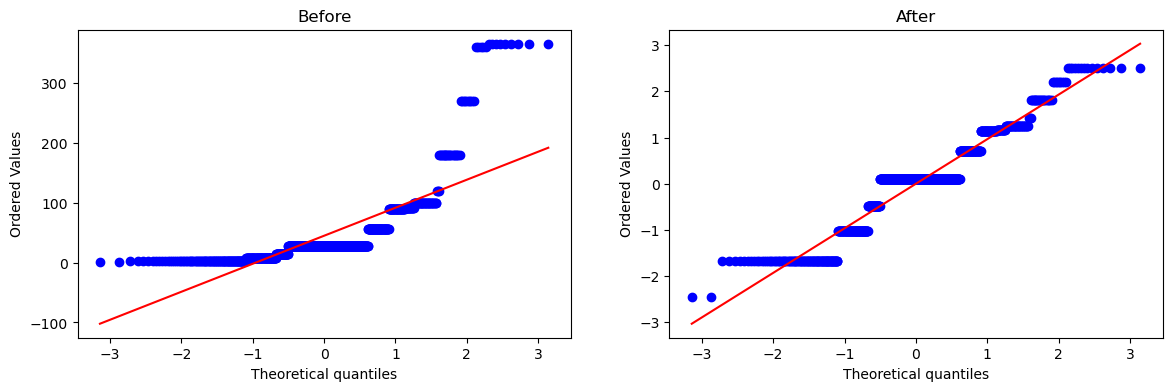

In [17]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title("Before")

    plt.subplot(122)
    stats.probplot(X_train_transformed[col],dist='norm',plot=plt)
    plt.title('After')

    plt.show()

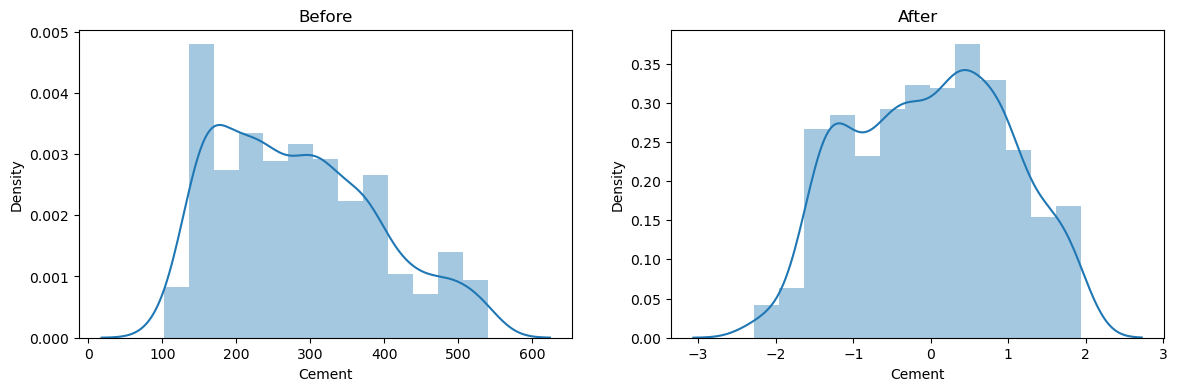

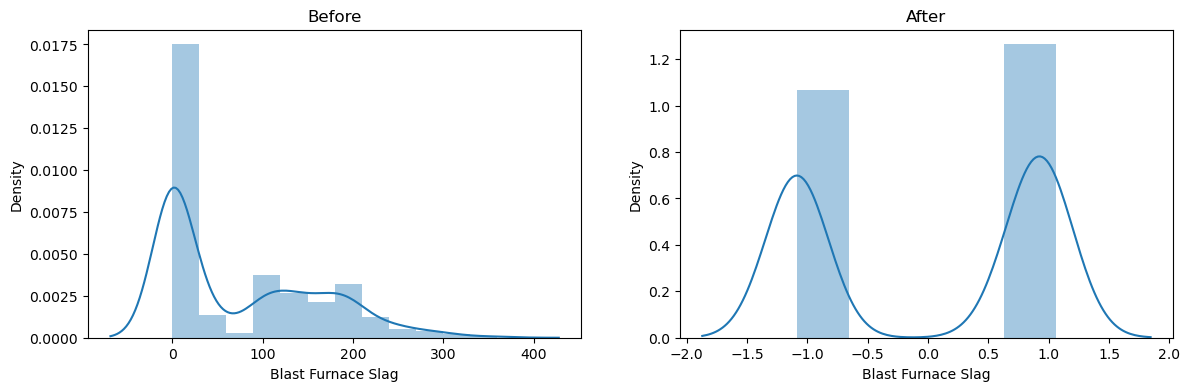

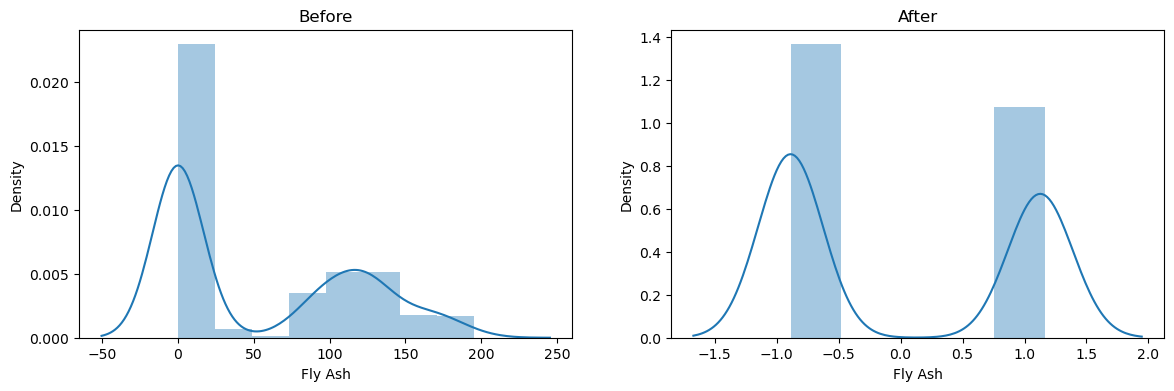

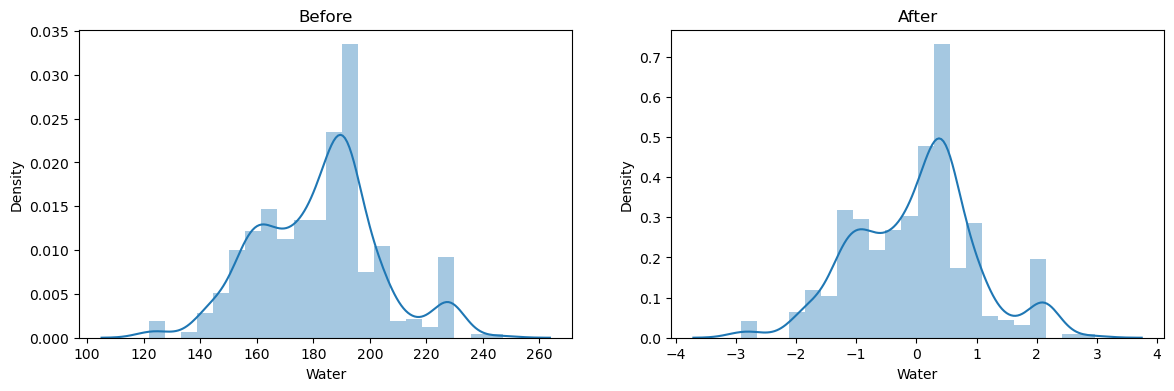

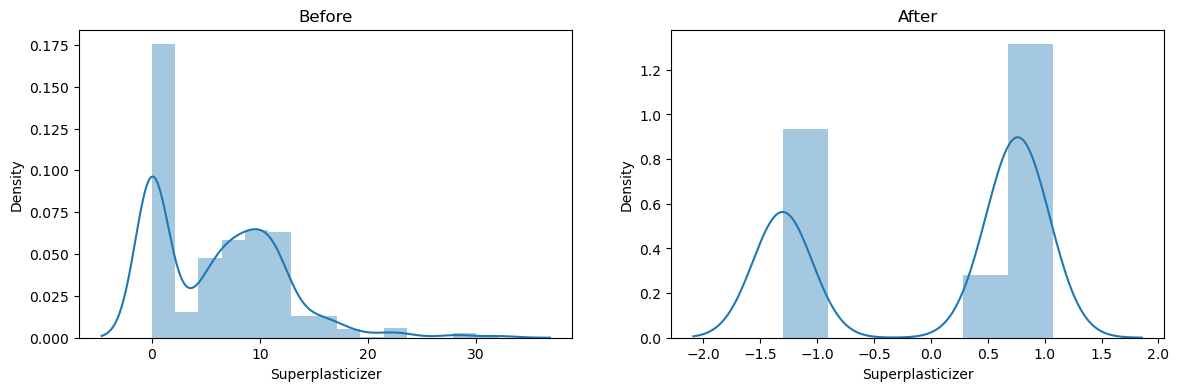

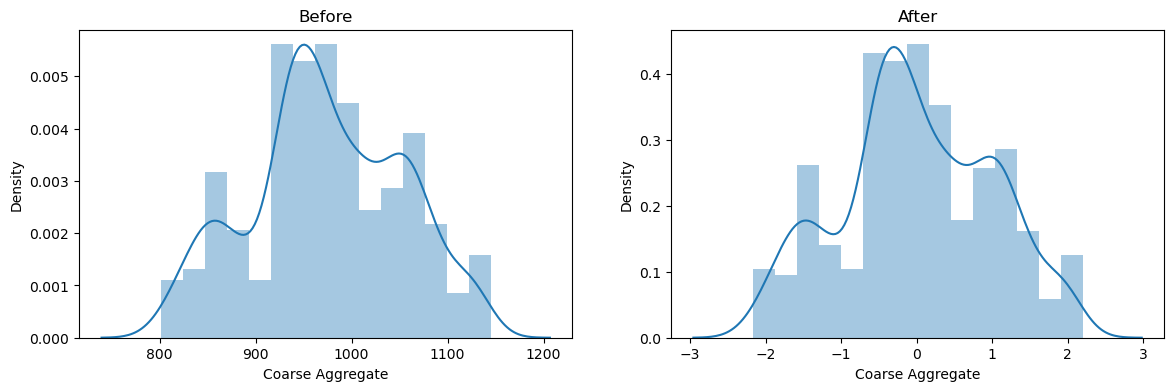

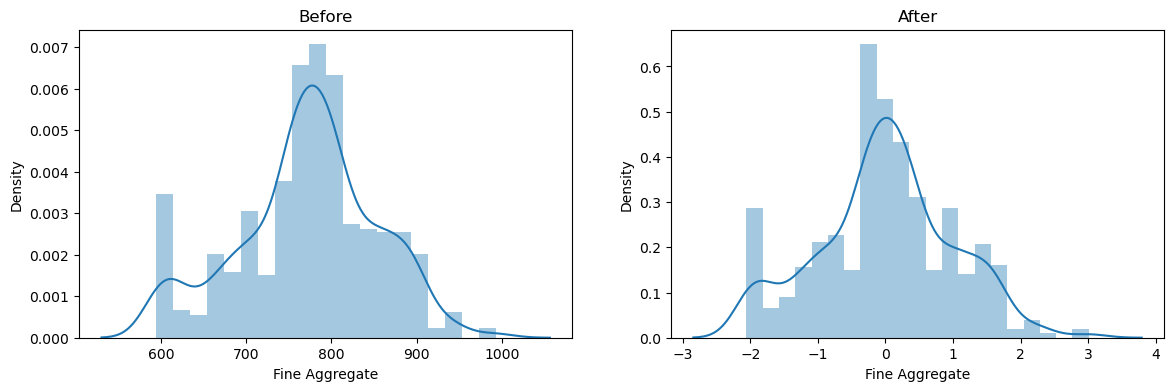

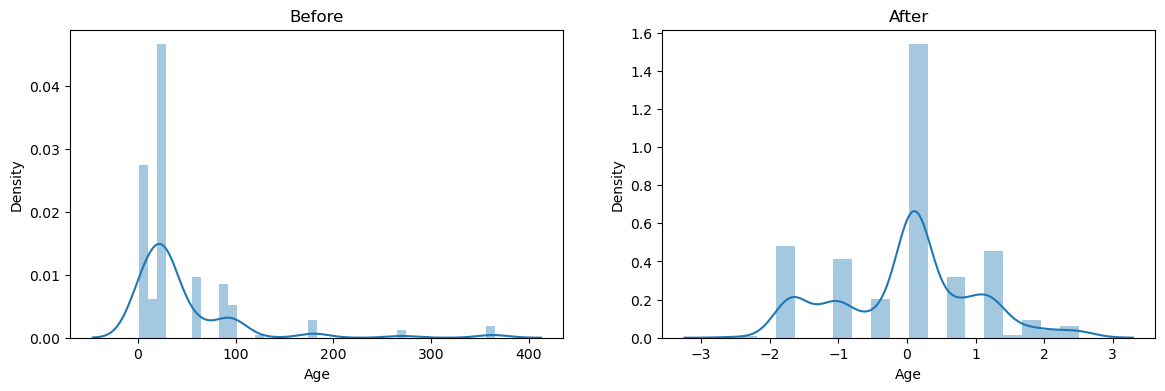

In [18]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title("Before")

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title('After')

    plt.show()

# Model training and score using PowerTransformer(box-cox)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred=lr.predict(X_test_transformed)
r2_score(y_pred,y_test)

0.7610932482737309